# Курсовой проект для курса "Python для Data Science"
# Выполнил - Шульгин С.О.


Подключение библиотек и скриптов

In [352]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler

# 4. Метрики качества
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [353]:
# Пути к директориям и файлам, загрузка данных
DATA_TRAIN_PATH = r'C:\Users\user\Documents\Geekbrains\Тема 4\Курсовик\train.csv'
DATA_TEST_PATH = (r'C:\Users\user\Documents\Geekbrains\Тема 4\Курсовик\test.csv')
DATA_PREDICTION_PATH = (r'C:\Users\user\Documents\Geekbrains\Тема 4\Курсовик\SShulgin_prediction.csv')
data_train = pd.read_csv(DATA_TRAIN_PATH, sep = ',')
data_test = pd.read_csv(DATA_TEST_PATH, sep = ',')


Описание данных датасетов data_train и data_test:

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

In [354]:
# Проверка загрузкой данных
data_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


In [355]:
data_test.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B


Анализ представленных в датасетах данных

In [356]:
# На всякий случай делаем копию датасета, чтобы не испортить случайно "эталонные" данные:
X = data_train.copy()
test = data_test.copy()

In [357]:
# Анализируем датасет на предмет корректности типов данных и отсутсвующих данных
X.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

(None, None)

In [358]:
# С помощью .describe получим первичное понимание того, что из себя представляют данные
np.set_printoptions(suppress = True)
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [359]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [360]:
# Преобразуем типы данных, исходя из их фактических значений
# Для этого вводим подпрограмму
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [361]:
X = reduce_mem_usage(X)
test = reduce_mem_usage(test)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


In [362]:
# Посмотрим на новые типы данных
X.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

(None, None)

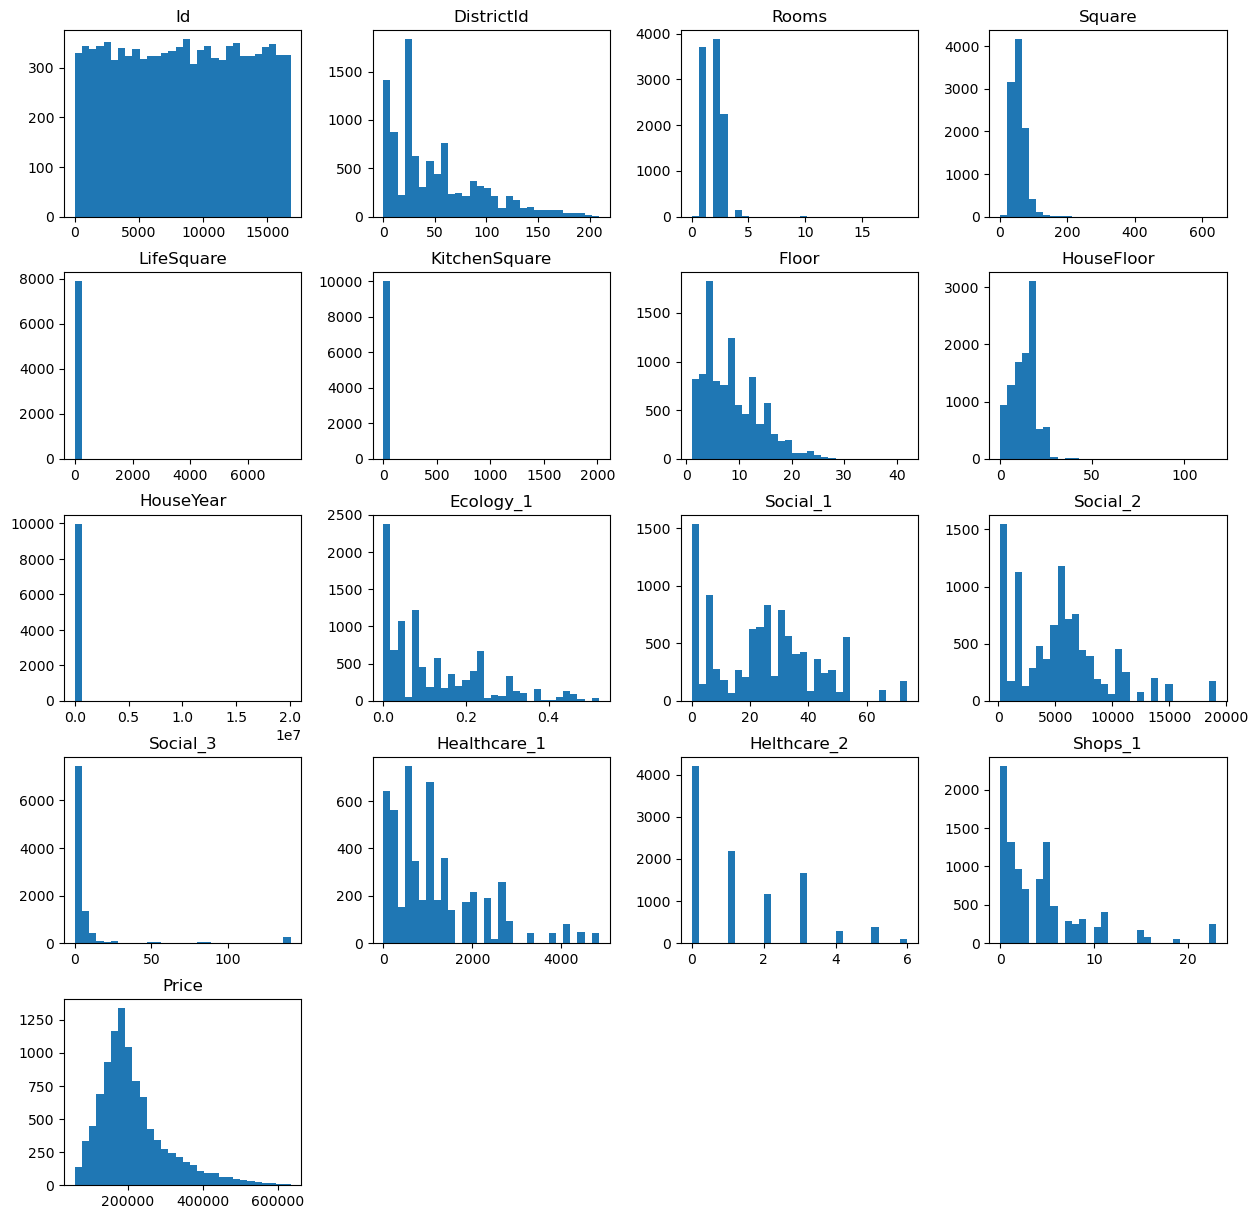

In [363]:
# Посмотрим бегло на распределение числовых признаков
X_num_features = X.select_dtypes(exclude=['category'])
X_num_features.hist(figsize=(15,15), bins=30, grid=False)
plt.show()

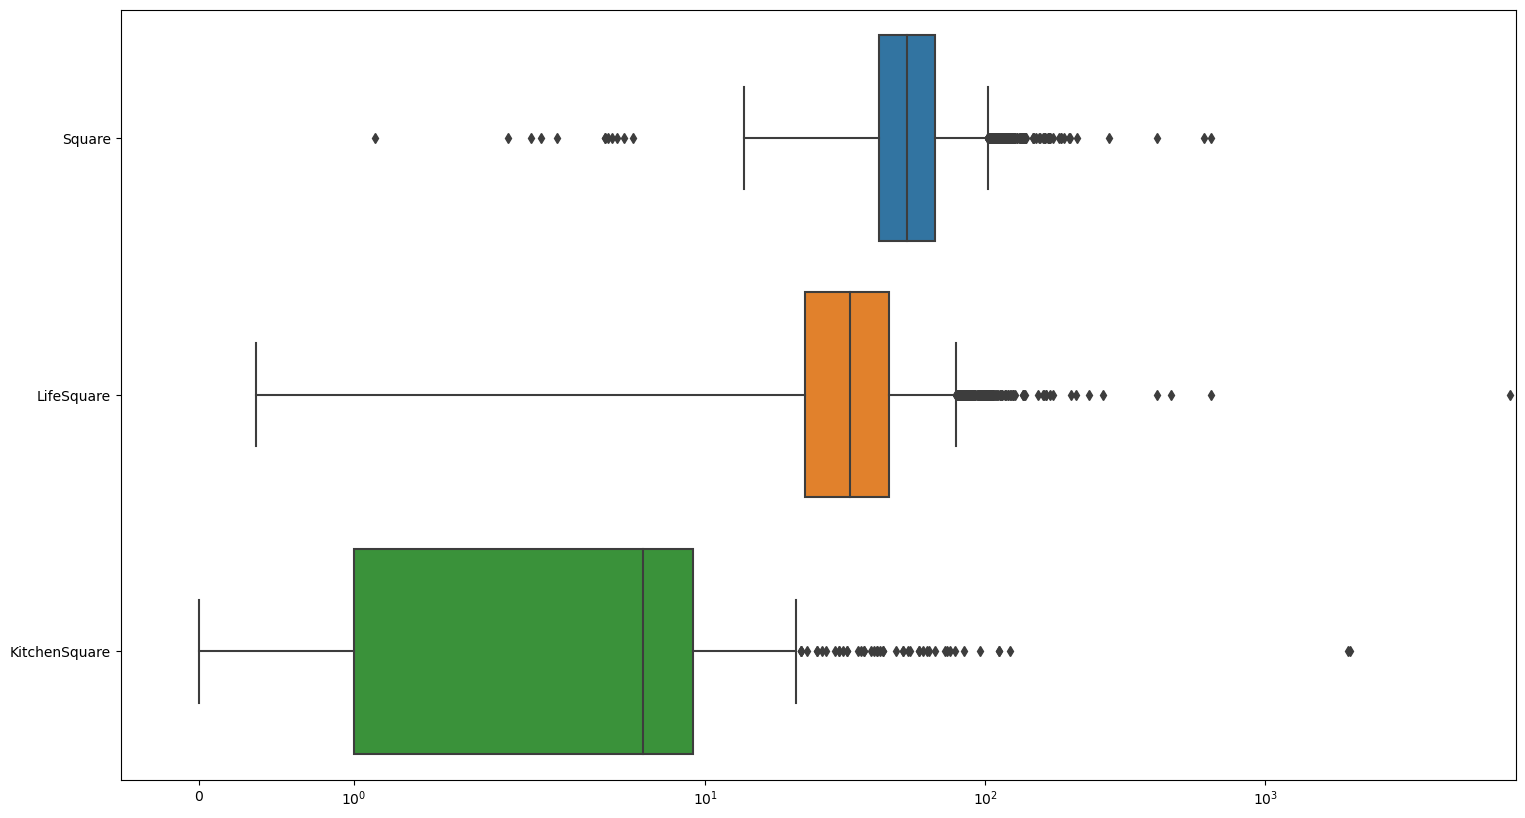

In [364]:
# Уточним для наглядности выбросы по площадям объектов (общая, жилая, кухня), используя логарифмическую шкалу
plt.figure(figsize=(18, 10))
sns.boxplot(data=X[['Square', 'LifeSquare', 'KitchenSquare']], orient='h')
plt.xscale('symlog')
plt.xlim(left=-0.5)
plt.show()

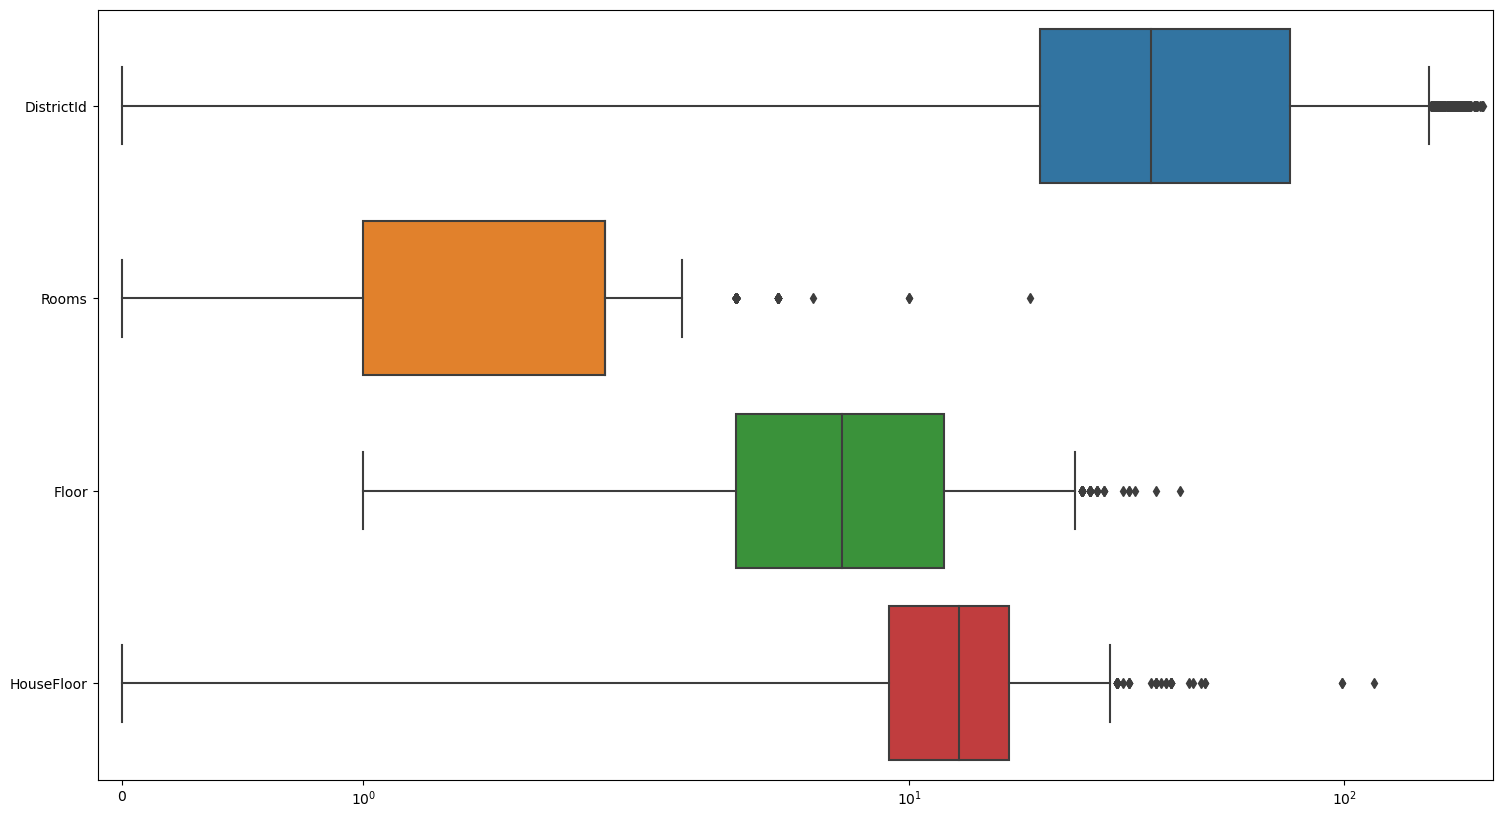

In [365]:
# Уточним для наглядности выбросы по целочисленным значениям
plt.figure(figsize=(18, 10))
sns.boxplot(data=X[['DistrictId', 'Rooms', 'Floor', 'HouseFloor', ]], orient='h')
plt.xscale('symlog')
plt.xlim(left=-0.1)
plt.show()

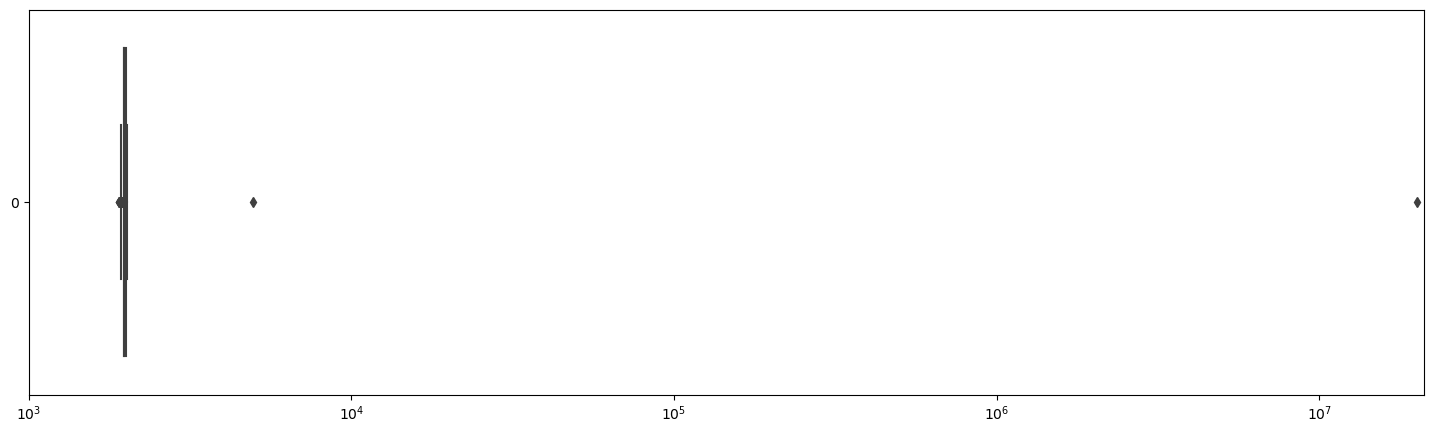

In [366]:
# Уточним для наглядности выбросы по году постройки
plt.figure(figsize=(18, 5))
sns.boxplot(data=X['HouseYear'], orient='h')
plt.xscale('symlog')
plt.xlim(left=1000)
plt.show()

Явно заметно наличие выбросов в количестве комнат, площадях, годах постройки дома.
Helthcare_2 - скорее относится к категориальным признакам.
Показатели местности Social, и Shops интерпретировать трудно.

Вероятно, в данных имеются не только ошибки, но и ОПЕЧАТКИ.

Для уточнения этого момента введем важный параметр для рынка недвижимости - ЦЕНУ КВАДРАТНОГО МЕТРА.

Возможно, это поможет в работе с выбросами. 

In [367]:
# Добавляем важный параметр для рынка недвижимости - ЦЕНУ КВАДРАТНОГО МЕТРА
X.insert(2,'SqMeterPrice', X.Price/X.Square)

In [368]:
# С помощью .describe еще раз посмотрим на данные
np.set_printoptions(precision = 2, suppress = True)
X.describe()

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,3988.375977,1.890500,56.315712,37.199596,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214139.218750
std,4859.01902,43.587592,3755.437744,0.839523,21.058718,86.241112,28.561113,5.241148,6.776192,2.005003e+05,0.119026,17.532614,4006.799803,23.831875,1021.518982,1.493601,4.806341,92872.304688
min,0.00000,0.000000,208.293457,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,4169.50000,20.000000,2918.525391,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,8394.50000,36.000000,3910.052246,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,12592.50000,75.000000,4692.375977,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,16798.00000,209.000000,230463.531250,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [369]:
# Создадим функцию для визуальной оценки признакa
def data_estimation (X, col):
    np.set_printoptions(suppress = True)
    print(X[col].value_counts() )
    plt.figure(figsize=(18, 5))
    sns.boxplot(data=X[col], orient='h')
#plt.xscale('symlog')
#plt.xlim(left=1800)
    plt.show()
    X.sort_values(by = col).tail(10)
    plt.show()
#return df 

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64


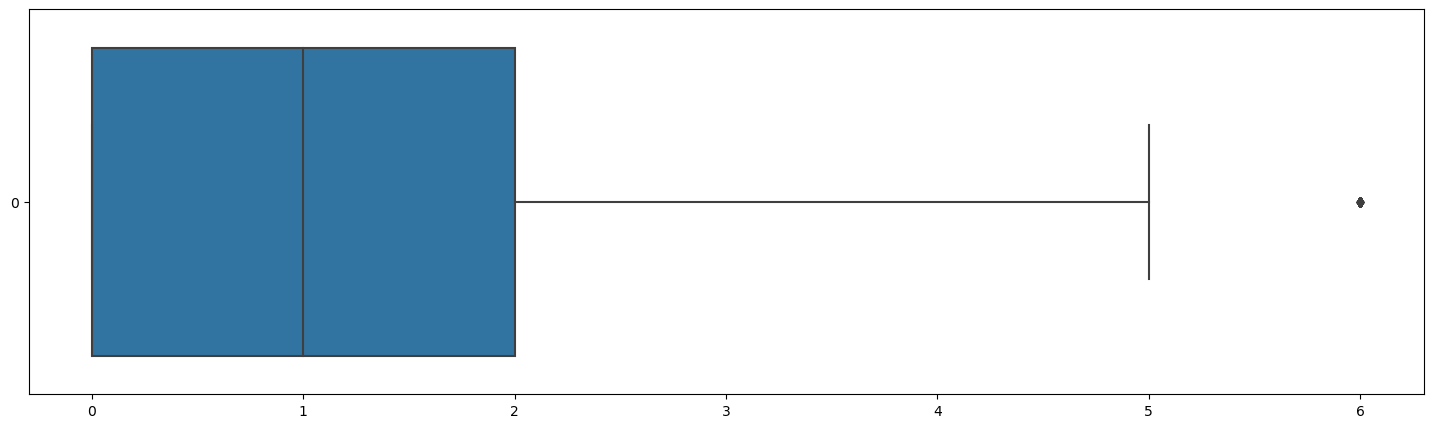

In [370]:
data_estimation(X, 'Helthcare_2')

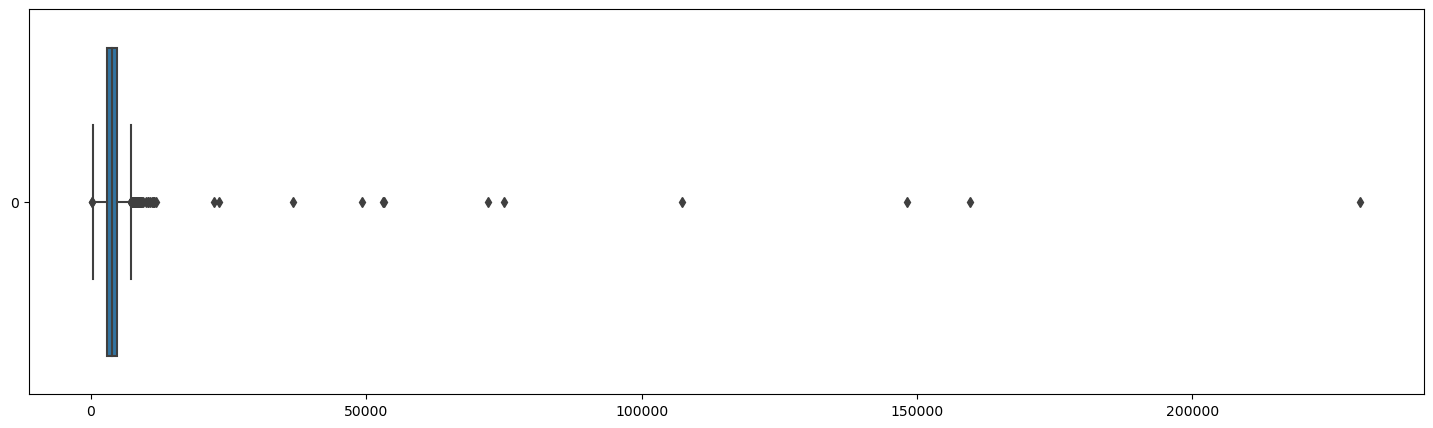

In [371]:
# Уточним для наглядности выбросы по цене квадратного метра
plt.figure(figsize=(18, 5))
sns.boxplot(data=X['SqMeterPrice'], orient='h')
#plt.xscale('symlog')
#plt.xlim(left=1800)
plt.show()

Выбросы по цене квадратного метра подтверждают необходимость коррекции данных

ОБЩИЕ НАБЛЮДЕНИЯ И ПРЕДЛОЖЕНИЯ ПО ПРЕДОБРАБОТКЕ ДАННЫХ

Из датасета непонятно, о какой стране идет речь. 
Исходя из того, что на первом вебинере Светлана Медведева говорила о курсовом проекте,
в котором будет предсказание цен на недвижимость в Калифорнии, предположим, что речь идет о США.

Вероятно, в данных имеются не только ошибки, но и ОПЕЧАТКИ.

Датасет явно заполнен не совсем достоверными данными. 
Сомнительно, что существуют жилые помещения площадью до 20 кв. м.

Не знаю американские нормативы, поэтому основываться будем на российские реалии.
Примем, что минимальная площадь квартиры (Square) не должна быть ниже 20 кв. м.
Объекты с площадью ниже 20 кв. м. приравняем к минимальной (20 кв. м.).

Также визуальный анализ данных показал "странные" данные объектов, площадь которых больше 200 кв. м.
У нах аномально низкая цена за кв. м. Заменим их площадь на на медианное значение в датасете.

Двухкомнатные квартиры редко бывают меньше 40 кв.м. Для таких квартир уменьшим количество комнат до одной.

В датафрейме много вариантов, где площадь кухни равна нулю. Это характерно для квартир-студий.
Однако квартира студия может быть только однокомнатной.
Поэтому в случае двух и более комнат нулевое значение площади кухни будем изменять.

Примем минимально возможную площадь кухни 5 кв. м. 
Исключения составляют варианты, где площадь кухни равна 0. Это могут быть квартиры-студии.
Примем максимально возможное отношение площади кухни к общей площади квартиры 0.3 (Кк = 0.3)
Кухни с площадью меньше минимально возможной в однокомнатных квартирах приравняем к минимально возможной.
В квартирах с Кк большим 0.3 площадь кухни приравняем к медианному значению площедей кухонь датасета.

При этом жилая площадь квартиры должна быть меньше общей площади хотя бы на 3 кв. м.
Предположим, что это минимальная площадь санузла и коридора. 

Графа с жилой площадью (LifeSquare)  содержит много пустых значений.
Примем коэффициент 0.65 максимального соотношения жилой площади к общей площади (Кж = 0.65). 
Примем минимальную площадь вспомогательных помещений равную 3 кв. м. (санузел и коридор).
Для жилой площади, если она меньше половины от площади, приравниваем ее к Кж.
Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до возможного максимума (Кж).

Количество комнат в среднем составляет от 1 до 5. Есть несколько объектов с количеством комнат
от 6 до 19. У них очень маленький метраж для такого количества комнат и таких объектов всего 4.
Поэтому приведем количество комнат в них к медианному значению.

Примем нормативный коэффициент отношения жилой площади к общей равной 0.65. 
Для жилой площади, если она меньше половины общей площади, то приравниваем ее к нормативному коэффициенту
Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до максимума
    
Минимальный этаж (Floor) расположения квартиры - нулевой, максимальный -42. 

По критерию "этажность дома" (HouseFloor) проходят три квартиры в домах общей этажностью 117 и 99 этажей соответственно.
В США вообще нет ЖИЛЫХ зданий с 117 и 99 этажами. Также для таких "небоскребов" характерна очень высокая стоимость квартир.
В представленном датасете она не сильно отличается от средней. Поэтому приведем этажность дома к медианному значению.

Очень много строк (1210) с ситуацией, когда этажность дома НИЖЕ этажа расположения квартиры.
Примем в данном случае, что  этаж расположения квартиры равен этажности дома.

Год постройки дома в целом по датасету введен корректно. Исключения составляют только 2 объекта с годами больше 2022.
При этом у одного объекта год стоит как 20052011, что, вероятно, говорит о явной ошибке ввода даты вместо года. Учитывая американский формат ввода дат (месяц–день–год), предположим что это был 2011 г. Второй объект с годом "4968" просто исключим.

Признак "Ecology_1" непонятно что обозначает, но распределен особо без выбросов. 
Приведем выбросы к медианному значению.

Признаки 'Ecology_2' и 'Ecology_3' имеют значения только А, В. Будем их рассматривать как категориальные признаки.
То же относится и к признаку 'Shops_2'

Признак 'Social_1' непонятно что обозначает, но распределен без выбросов. 
Оставляем без изменений.

Признак "Social_2" непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак "Social_3" непонятно что обозначает, но имеет довольно много выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак 'Healthcare_1' непонятен и содержит очень много пропущенных значений. 
Откажемся от учета этого признака в процессе анализа.

Признак "Shops_1" непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Признак 'Helthcare_2' непонятно что обозначает, но распределен особо без выбросов. 
Вероятно, это какие-то параметры инфраструктуры, поэтому их трогать пока не будем.

Идентификатор объекта Id не несет никакой информации для целей машинного обучения. Поэтому пока его удаляем.


На основании вышеизложенных положений и доводов создадим подпрограмму коррекции данных
исходного датасета "data_correction"

In [372]:
# ПОДПРОГРАММА ПРЕДОБРАБОТКИ ДАННЫХ
# создана на основании пункта "ОБЩИЕ НАБЛЮДЕНИЯ И ПРЕДЛОЖЕНИЯ ПО ПРЕДОБРАБОТКЕ ДАННЫХ"
def data_correction(X):
    # Создадим категориальные признаки из значений 'Ecology_2', 'Ecology_3' и 'Shops_2'
    X['Ecology_2'] = X['Ecology_2'].map({'A':1, 'B':2})
    X['Ecology_3'] = X['Ecology_3'].map({'A':1, 'B':2})
    X['Shops_2'] = X['Shops_2'].map({'A':1, 'B':2})

    # Откажемся от учета признака 'Healthcare_1' в процессе анализа
    X = X.drop(columns='Healthcare_1') 
    
    # Идентификатор объекта Id не несет никакой информации для целей машинного обучения. Поэтому пока его удаляем.
    X = X.drop(['Id'], axis = 1)
    
    # Объекты с площадью ниже 20 кв. м. приравняем к минимальной площади - 20 кв. м.
    X.loc[(X['Square'] < 20), 'Square'] = 20
    
    # Объекты с площадью выше 200 кв. м. заменим на медианное значение
    X.loc[(X['Square'] > 200) , 'Square'] = X['Square'].median()
           
     # Количество комнат больше 5 заменим на медианное значение
    X.loc[(X['Rooms'] > 5) , 'Rooms'] = X['Rooms'].median()
        
    # Для квартир площадью меньше 40 кв. м. уменьшим количество комнат до одной
    X.loc[(X['Square'] <= 40), 'Rooms'] = 1
    
    # Кухни с площадью меньше минимально возможной в однокомнатных квартирах приравняем к минимально возможной.
    # Исключения составляют варианты, где площадь кухни равна 0. Это могут быть квартиры-студии.
    
    X.loc[((X['KitchenSquare'] <= 5) & (X['Rooms'] == 1) & (X['KitchenSquare'] != 0) ) , 'KitchenSquare'] = 5
    
    # В квартирах с Кк большим 0.4 площадь кухни приравняем к медианному значению
    X.loc[((X['KitchenSquare'] < 5) | (X['KitchenSquare'] > 0.4 * X['Square'])), 'KitchenSquare'] = X['KitchenSquare'].median()
    
    # Для жилой площади, если она меньше половины от площади, приравниваем ее к Кж.
    X.loc[X['LifeSquare'] < (0.5 * X['Square']), 'LifeSquare'] = X['Square'] * 0.65
    X.loc[X['LifeSquare'].isnull(), 'LifeSquare'] = X['Square'] * 0.65
           
    # Если жилая площадь больше, чем общая площадь за минусом кухни и туалета, то уменьшаем до возможного максимума (Кж).       
    X.loc[(X['LifeSquare'] > (X['Square'] - X['KitchenSquare'] - 3)), 'LifeSquare'] = (X['Square'] - X['KitchenSquare'] - 3)  
    # df.loc[(df['LifeSquare'] < MIN_LIFE), 'LifeSquare'] = MIN_LIFE
    
    # Объекты на этажах выше 99 приравняем к медианному значению
    X.loc[X['HouseFloor'] >= 99, 'HouseFloor'] = X['HouseFloor'].median()
            
    # Если этажность дома НИЖЕ этажа расположения квартиры принимаем, что этажность дома равна этажу расположения квартиры 
    X.loc[(X['Floor'] > X['HouseFloor']), 'Floor'] = X['Floor']
    
    # Год постройки дома в целом по датасету введен корректно. Исключения составляют только 2 объекта с годами больше 2022. 
    # При этом у одного объекта год стоит как 20052011, что, вероятно, говорит о явной ошибке ввода даты вместо года. 
    #Учитывая американский формат ввода дат (месяц–день–год), предположим что это был 2011 г. 
    # Второй объект с годом "4968" приравняем к медианному значению.
    X.loc[(X['HouseYear'] == 20052011), 'HouseYear'] = 2011
    X.loc[(X['HouseYear'] > 2022), 'HouseYear'] = X['HouseYear'].median()
    
    return X

In [373]:
# Подготавливаем данные с помощью data_correction()
X = data_correction(X)


In [374]:
# Проверяем полученные данные
X.sort_values('Square')

,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
3413,5,72032.843750,1.0,20.000000,12.000000,5.0,1,1.0,1977,0.150818,2,2,16,3433,4,4,5,2,369472.406250
4739,81,5686.584961,1.0,20.000000,10.000000,7.0,4,5.0,1960,0.319809,2,2,25,4756,16,5,8,2,78388.804688
4853,27,53253.582031,1.0,20.000000,11.000000,6.0,1,0.0,1977,0.017647,2,2,2,469,0,0,0,2,126596.945312
212,88,75042.117188,1.0,20.000000,12.000000,5.0,24,22.0,1977,0.127376,2,2,43,8429,3,3,9,2,412511.093750
3794,101,6258.833984,1.0,20.000000,12.000000,5.0,5,5.0,1970,0.225825,1,2,41,6558,7,3,2,2,115845.859375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,13,3396.668457,5.0,183.382278,100.985504,15.0,2,6.0,1997,0.090799,2,2,74,19083,2,5,15,2,622888.812500
5087,129,1830.347168,4.0,185.906403,120.839157,31.0,5,3.0,2015,0.020741,2,2,24,5613,5,2,5,2,340273.250000
7201,129,2268.132080,4.0,186.692596,121.350182,32.0,3,3.0,2011,0.020741,2,2,24,5613,5,2,5,2,423443.468750
652,56,1774.327637,3.0,190.857681,107.376167,19.0,7,3.0,2007,0.000000,2,2,23,5067,4,2,6,2,338644.062500


In [375]:
# Проверяем отсутствие пропусков
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DistrictId     10000 non-null  int16   
 1   SqMeterPrice   10000 non-null  float32 
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     10000 non-null  float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Helthcare_2    10000 non-null  int8    
 16  Shops_1        10000 non-null  int8    
 17  Shops_2        10000 non-null  c

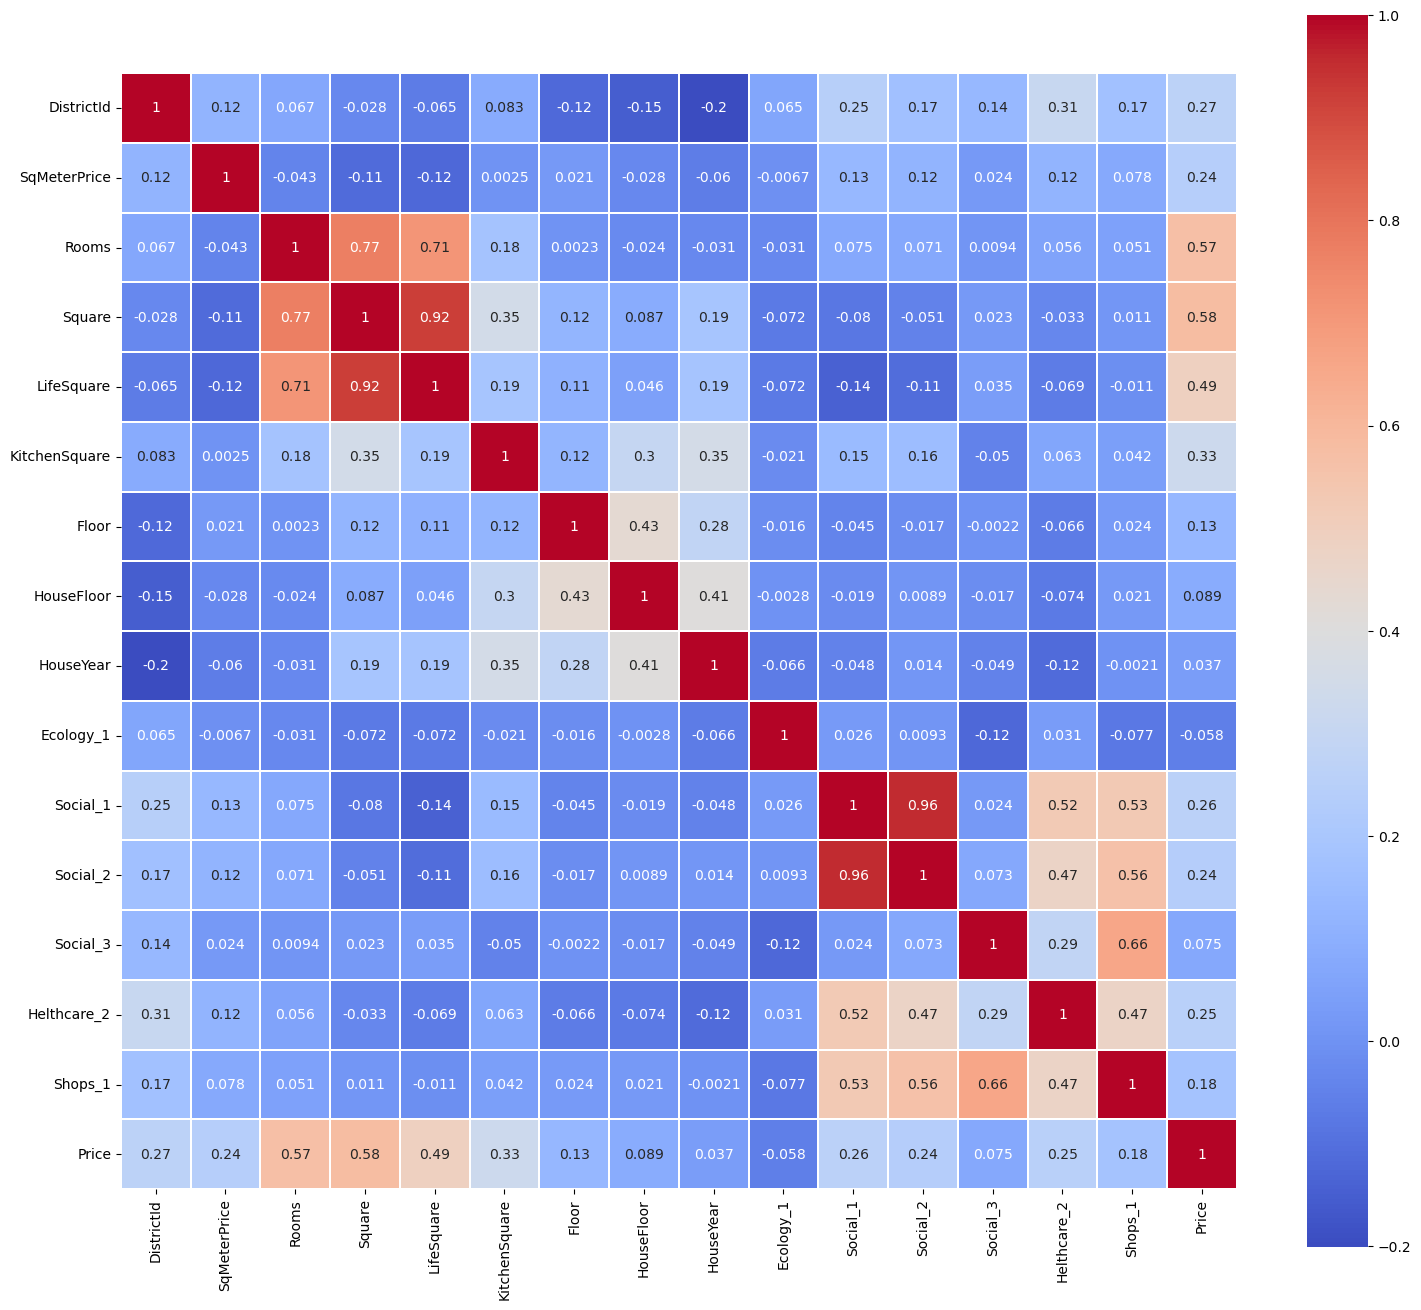

In [376]:
# Посмотрим на корреляцию признаков в датасете
X_corr=X.corr()
plt.figure(figsize=(18,16))
sns.heatmap(X_corr, annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

<AxesSubplot:>

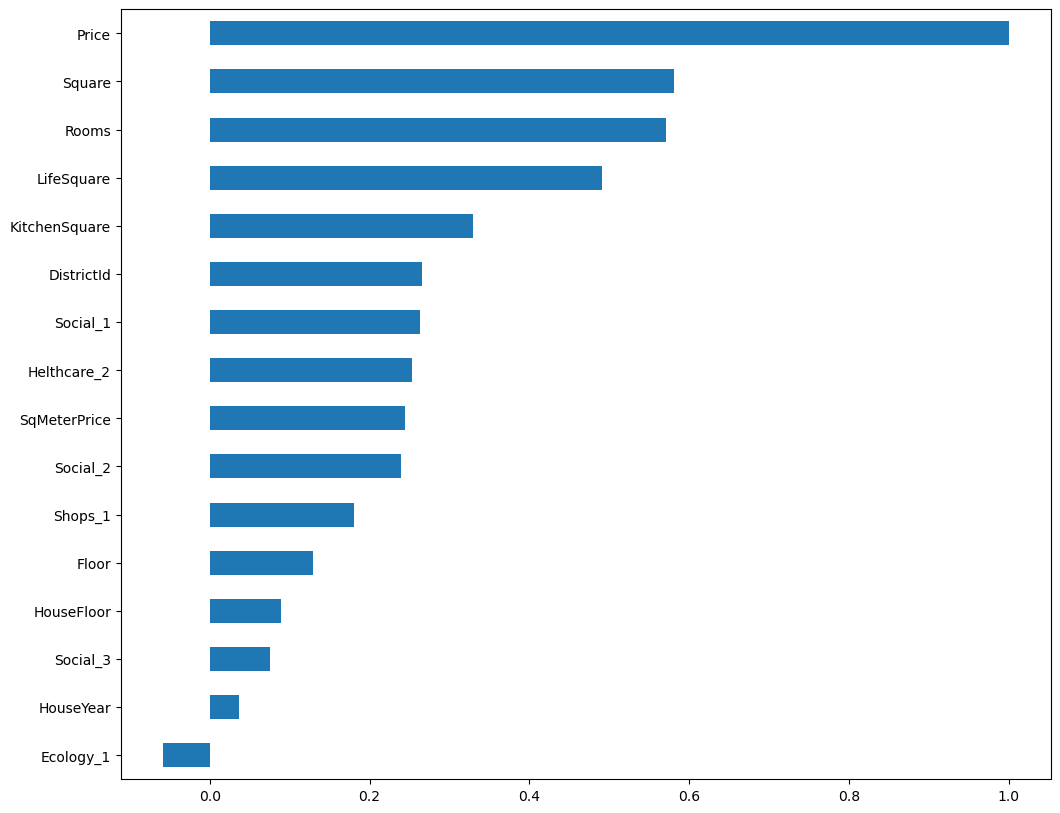

In [377]:
# Для большей наглядности построим диаграмму корреляции признаков в датасете
plt.figure(figsize = (12,10))
X.corr()['Price'].sort_values(ascending=True).plot(kind='barh')

Видим, что целевая переменная сильно зависит от количества комнат и площадей

Подготовка модели

In [378]:
# Отделяем от датафрейма целевую переменную Price
# и удаляем ознакомительный параметр SqMeterPrice
y=X['Price']
X=X.drop(['SqMeterPrice', 'Price'], axis=1)

X.shape, y.shape

((10000, 17), (10000,))

In [379]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) 
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 30% от всех данных.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7000, 17), (3000, 17), (7000,), (3000,))

Обучим модель и сделаем прогноз

In [380]:
%%time
# Лучшие параметры метрик были получены при использовании модели RandomForestRegressor из модуля sklearn.ensemble.
# При использовании модели RandomForestRegressor данные не масштабируем.
# с агрументами n_estimators равным 1000, max_depth 12. 


model = RandomForestRegressor(n_estimators= 1000, min_samples_leaf=1, n_jobs=-1
                                     , random_state=42, max_features= 3)
model.fit(X_train, y_train)

#y_pred = model.predict(X_test)
#y_pred = y_pred.flatten()
#y_pred.shape

Wall time: 3.58 s


RandomForestRegressor(max_features=3, n_estimators=1000, n_jobs=-1,
                      random_state=42)

Валидация полученных данных

In [381]:
# Подпрограмма для валидации полученных данных
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Критерий R2 тренировочного датасета:\t" + str(round(r2(train_true_values, train_pred_values), 2)))
    print("Критерий R2 тестового датасета:\t" + str(round(r2(test_true_values, test_pred_values), 2)))
    
    plt.figure(figsize=(12, 10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.plot([0, 650000], [0, 650000], linestyle='--', color='black')
    plt.xlabel('Предсказанные значения цены')
    plt.ylabel('Истинные значения цены')
    plt.title('Тренировочная выборка')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.plot([0, 650000], [0, 650000], linestyle='--', color='black')
    plt.xlabel('Предсказанные значения цены')
    plt.ylabel('Истинные значения цены')
    plt.title('Тестовая выборка')

    plt.show()

Критерий R2 тренировочного датасета:	0.97
Критерий R2 тестового датасета:	0.73


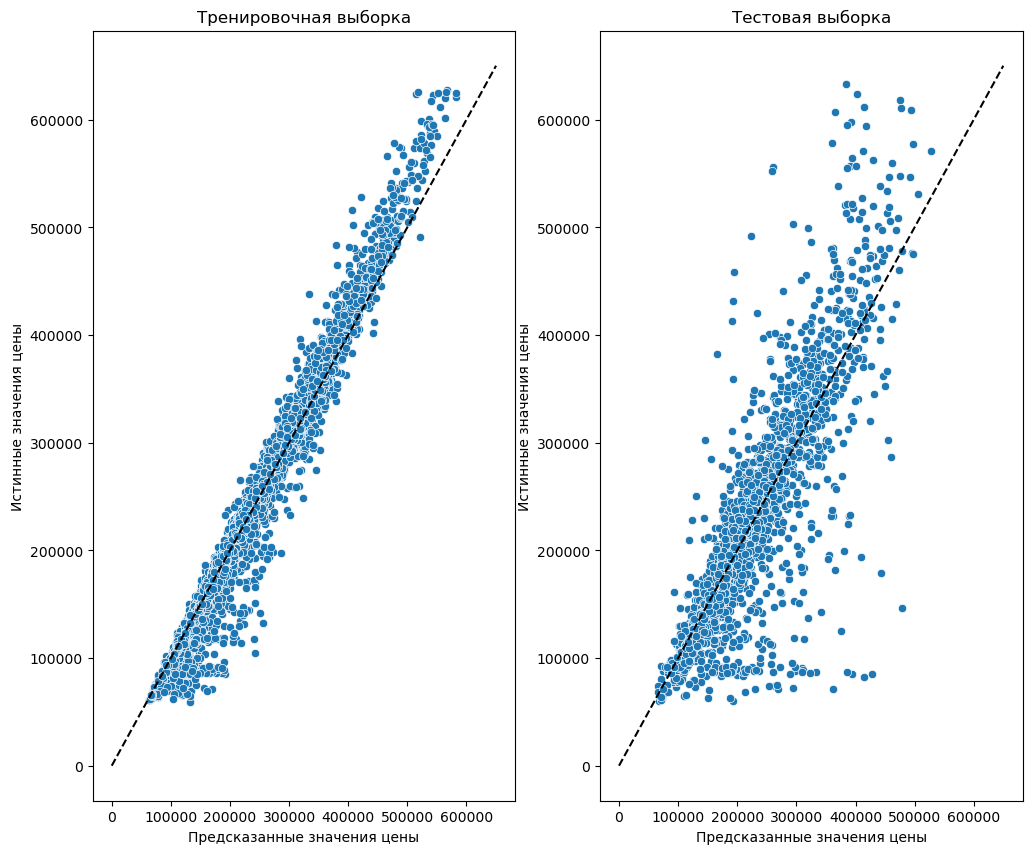

In [382]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

ВЫВОД: Критерий R2 получился больше 0.6, что соответствует требованиям к курсовой работе.

Видим хорошую линейную зависимость, практически без выбросов

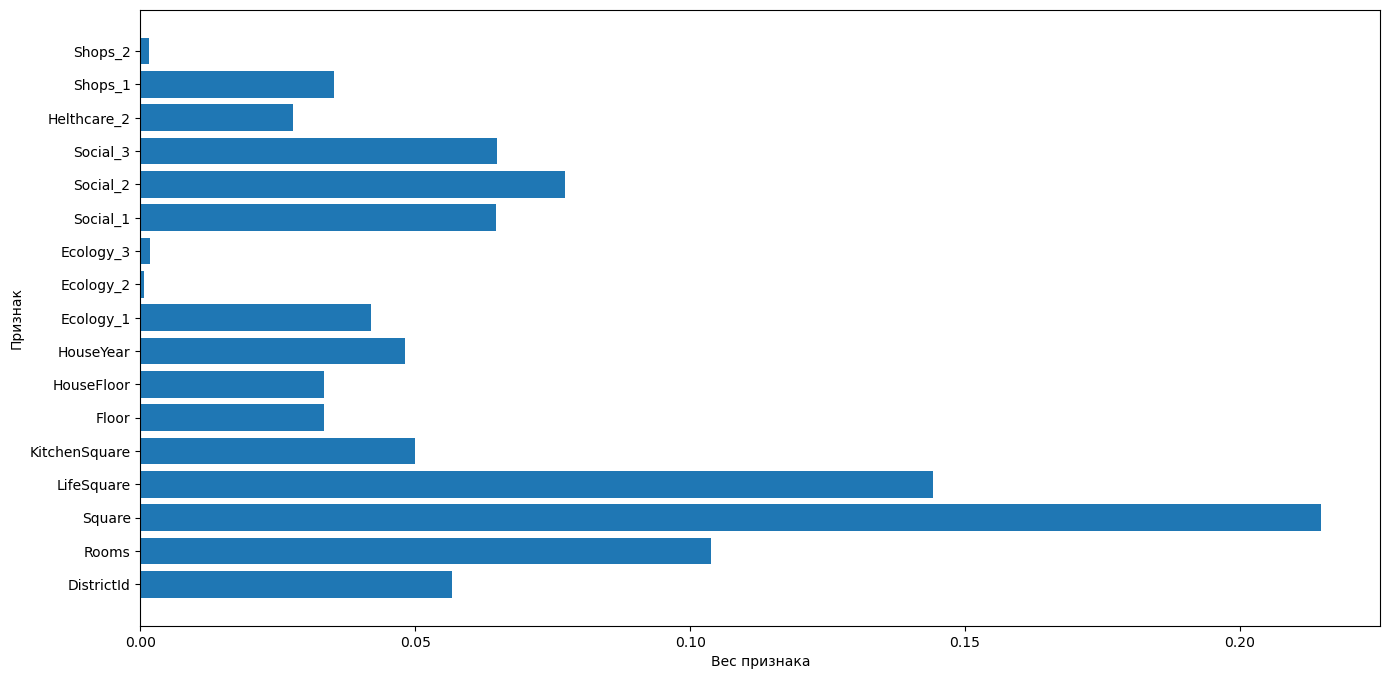

In [383]:
# Посмотрим, какие признаки модель сочла значимыми:
plt.figure(figsize=(16,8))
plt.barh(X_train.columns.tolist(), model.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

# Тестирование

In [384]:
# Еще раз посмотрим на прогнозируемый дататест
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882645,33.432781,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263184,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597818,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046608,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809795,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198471,21.807060,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282623,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [385]:
# Заранее создадим копию столбца 'Id'. Oн будет нужен для выходного файла с результатами прогноза цены.
test_id = test['Id'].copy()
test_id

0         725
1       15856
2        5480
3       15664
4       14275
        ...  
4995     8180
4996     4695
4997     5783
4998     4780
4999    12504
Name: Id, Length: 5000, dtype: int16

In [386]:
test.shape

(5000, 19)

In [387]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             5000 non-null   int16   
 1   DistrictId     5000 non-null   int16   
 2   Rooms          5000 non-null   float32 
 3   Square         5000 non-null   float32 
 4   LifeSquare     3959 non-null   float32 
 5   KitchenSquare  5000 non-null   float32 
 6   Floor          5000 non-null   int8    
 7   HouseFloor     5000 non-null   float32 
 8   HouseYear      5000 non-null   int16   
 9   Ecology_1      5000 non-null   float32 
 10  Ecology_2      5000 non-null   category
 11  Ecology_3      5000 non-null   category
 12  Social_1       5000 non-null   int8    
 13  Social_2       5000 non-null   int16   
 14  Social_3       5000 non-null   int16   
 15  Healthcare_1   2623 non-null   float32 
 16  Helthcare_2    5000 non-null   int8    
 17  Shops_1        5000 non-null   in

In [388]:
# Подготовка тестовых данных аналогично тренировочным
test = data_correction(data_test)
test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,2,2,11,2748,1,0,0,2
1,74,2.0,69.263183,45.021069,6.0,6,1.0,1977,0.075779,2,2,6,1437,3,0,2,2
2,190,1.0,20.000000,11.000000,6.0,2,5.0,1909,0.000000,2,2,30,7538,87,5,5,2
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,2,2,23,4583,3,3,3,2
4,27,1.0,47.527111,39.527111,5.0,17,17.0,2017,0.072158,2,2,2,629,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,2,2,36,5992,0,1,1,2
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,2,2,1,264,0,0,1,2
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,2,2,74,19083,2,5,15,2
4998,62,2.0,81.305222,52.848394,6.0,4,0.0,1977,0.072158,2,2,2,629,1,0,0,1


In [389]:
test.info(), X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   int64  
dtypes: float64(6), int64(11)
memory usage: 664.2 KB
<cla

(None, None)

In [390]:
test.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,51.279200,1.893400,56.412982,37.002320,7.232800,8.632000,12.583600,1984.392600,0.119874,1.990400,1.970200,24.933800,5406.900000,8.262600,1.31940,4.242800,1.917600
std,44.179466,0.811769,18.729328,14.223980,2.389005,5.483228,6.678318,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,1.47994,4.777365,0.275001
min,0.000000,0.000000,20.000000,11.000000,5.000000,1.000000,0.000000,1908.000000,0.000000,1.000000,1.000000,0.000000,168.000000,0.000000,0.00000,0.000000,1.000000
25%,21.000000,1.000000,41.906231,26.880284,6.000000,4.000000,9.000000,1973.000000,0.019509,2.000000,2.000000,6.000000,1564.000000,0.000000,0.00000,1.000000,2.000000
50%,37.000000,2.000000,52.919578,33.736319,6.000000,7.000000,12.000000,1977.000000,0.072158,2.000000,2.000000,25.000000,5285.000000,2.000000,1.00000,3.000000,2.000000
75%,77.000000,2.000000,66.269760,44.992335,9.000000,12.000000,17.000000,2000.000000,0.195781,2.000000,2.000000,36.000000,7287.000000,5.000000,2.00000,6.000000,2.000000
max,212.000000,5.000000,189.679576,159.729035,42.000000,78.000000,48.000000,2020.000000,0.521867,2.000000,2.000000,74.000000,19083.000000,141.000000,6.00000,23.000000,2.000000


Предсказание стоимости недвижимости

In [391]:
test['Price_predict'] = model.predict(test)


In [393]:
test

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price_predict
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,2,2,11,2748,1,0,0,2,164038.304742
1,74,2.0,69.263183,45.021069,6.0,6,1.0,1977,0.075779,2,2,6,1437,3,0,2,2,229729.295547
2,190,1.0,20.000000,11.000000,6.0,2,5.0,1909,0.000000,2,2,30,7538,87,5,5,2,228999.644766
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,2,2,23,4583,3,3,3,2,344678.067172
4,27,1.0,47.527111,39.527111,5.0,17,17.0,2017,0.072158,2,2,2,629,1,0,0,1,145057.465266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,2,2,36,5992,0,1,1,2,241779.186301
4996,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,2,2,1,264,0,0,1,2,126350.283367
4997,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,2,2,74,19083,2,5,15,2,330200.224133
4998,62,2.0,81.305222,52.848394,6.0,4,0.0,1977,0.072158,2,2,2,629,1,0,0,1,200082.833719


In [394]:
# Проверяем целостность получившихся данных
test.describe(include='all').transpose().apply(round)

,count,mean,std,min,25%,50%,75%,max
DistrictId,5000.0,51.0,44.0,0.0,21.0,37.0,77.0,212.0
Rooms,5000.0,2.0,1.0,0.0,1.0,2.0,2.0,5.0
Square,5000.0,56.0,19.0,20.0,42.0,53.0,66.0,190.0
LifeSquare,5000.0,37.0,14.0,11.0,27.0,34.0,45.0,160.0
KitchenSquare,5000.0,7.0,2.0,5.0,6.0,6.0,9.0,42.0
Floor,5000.0,9.0,5.0,1.0,4.0,7.0,12.0,78.0
HouseFloor,5000.0,13.0,7.0,0.0,9.0,12.0,17.0,48.0
HouseYear,5000.0,1984.0,19.0,1908.0,1973.0,1977.0,2000.0,2020.0
Ecology_1,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Ecology_2,5000.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0


In [402]:
# Проверяем данные перед загрузкой в файл
result=pd.DataFrame({'Id':test_id, 'Predicted_price':round((test['Price_predict']), 2)})
result

,Id,Predicted_price
0,725,164038.30
1,15856,229729.30
2,5480,228999.64
3,15664,344678.07
4,14275,145057.47
...,...,...
4995,8180,241779.19
4996,4695,126350.28
4997,5783,330200.22
4998,4780,200082.83


В файле с предсказаниями имеется 5001 строка (шапка + 5000 предсказаний)

Загрузка требуемых данных в файл

In [403]:
result.to_csv(DATA_PREDICTION_PATH, index=False)